In [40]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
#importing data 
df = pd.read_csv("B:\studio\workspace\datamining\out.csv",sep=",")
infos= df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [12]:
#Checking pour les valeurs nulls 
df.isnull().sum()


months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

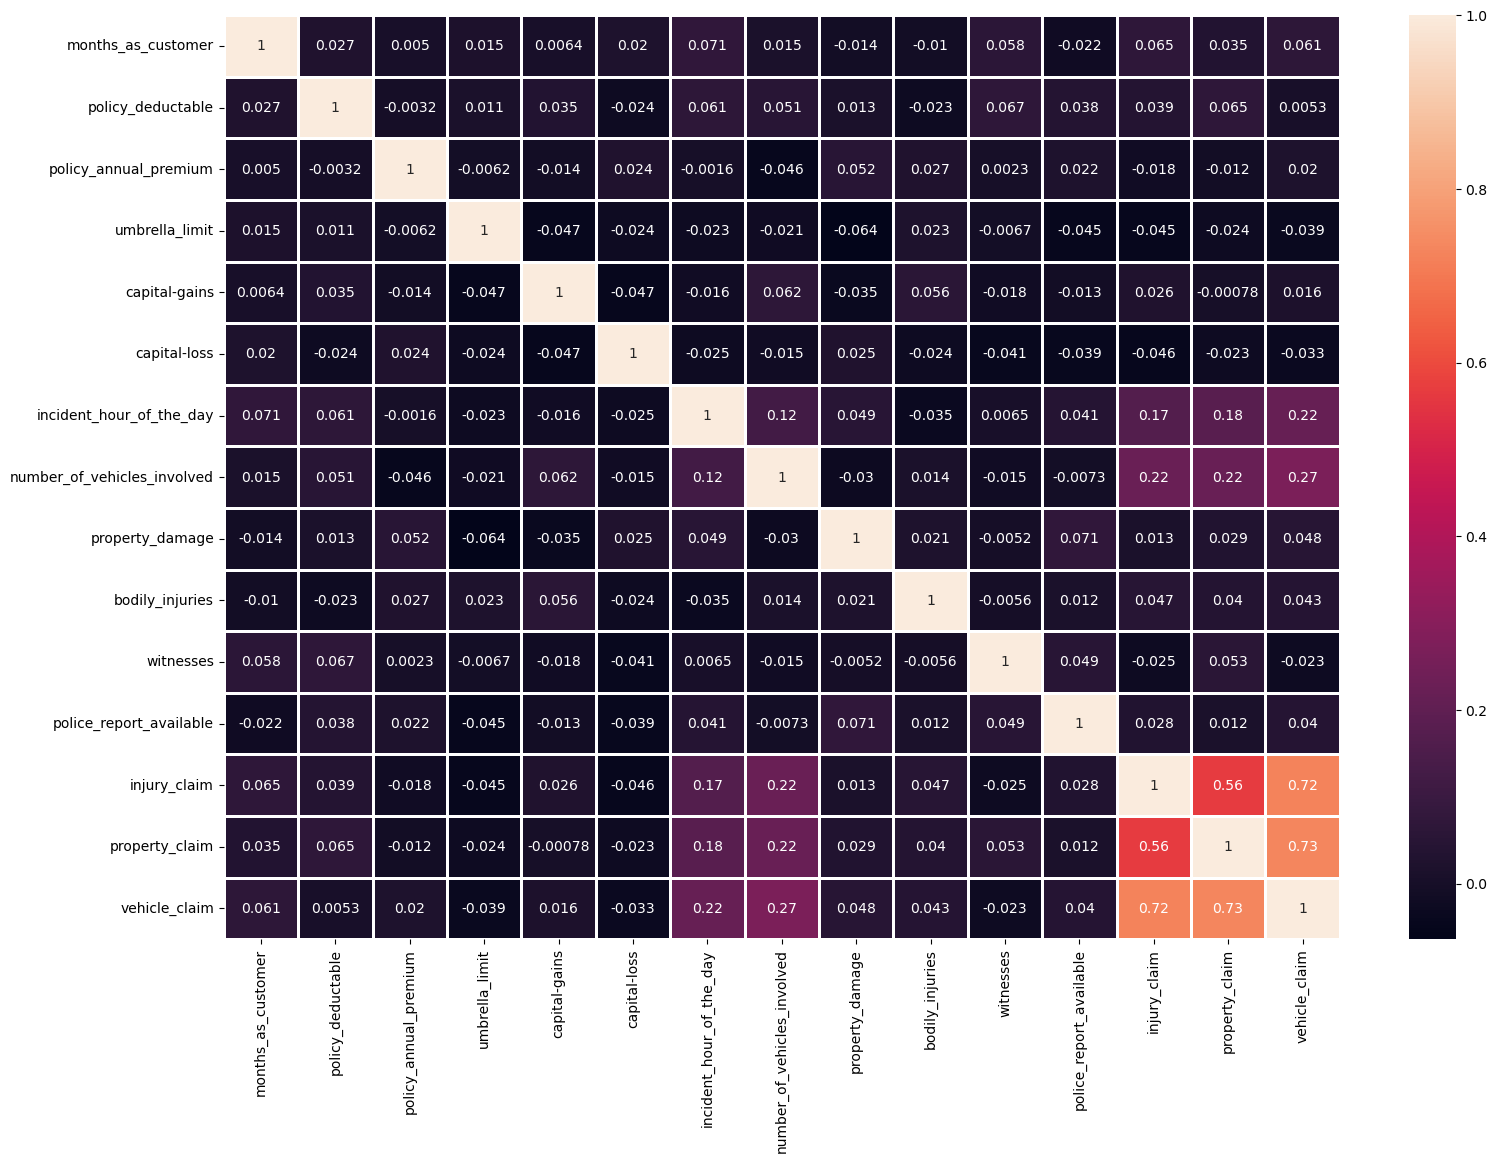

In [49]:
#nous voyons que nous avons bien netoyyer notre dataset et on a aucune valeur null 
#heatMap
plt.figure(figsize=(18,12))
corr=df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [11]:
#cheking pour les valeurs uniques
unique=df.nunique()
print(unique)

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [14]:
#eliminons les colonnes qui ont beaucoups de valeurs uniques et qui ne peuvent pas nous aider dans notre classification
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','_c39']
df.drop(to_drop, inplace = True, axis = 1)
df

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,202,34,100/300,500,848.07,3000000,MALE,JD,exec-managerial,not-in-family,...,1,1,2,1,0,5720,1040,520,4160,Y
1,224,40,100/300,2000,1291.70,0,FEMALE,JD,sales,not-in-family,...,1,0,1,0,1,69840,7760,15520,46560,N
2,241,45,500/1000,2000,1104.50,0,FEMALE,PhD,machine-op-inspct,unmarried,...,1,0,2,2,0,91650,14100,14100,63450,N
3,64,25,250/500,1000,954.16,0,MALE,Masters,prof-specialty,husband,...,4,0,0,0,0,75600,12600,12600,50400,N
4,166,37,100/300,2000,1337.28,8000000,MALE,JD,craft-repair,husband,...,3,0,2,2,0,67140,7460,7460,52220,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,95,32,500/1000,2000,1356.64,0,MALE,Masters,machine-op-inspct,not-in-family,...,3,1,0,3,1,83160,15120,15120,52920,N
996,205,42,100/300,2000,1387.70,4000000,FEMALE,High School,priv-house-serv,other-relative,...,1,0,2,1,0,86130,15660,15660,54810,N
997,41,25,100/300,1000,1004.14,0,MALE,Masters,priv-house-serv,wife,...,3,0,1,3,0,48000,9600,4800,33600,N
998,137,35,500/1000,500,1107.07,0,FEMALE,High School,protective-serv,husband,...,1,0,0,0,1,3300,600,600,2100,N


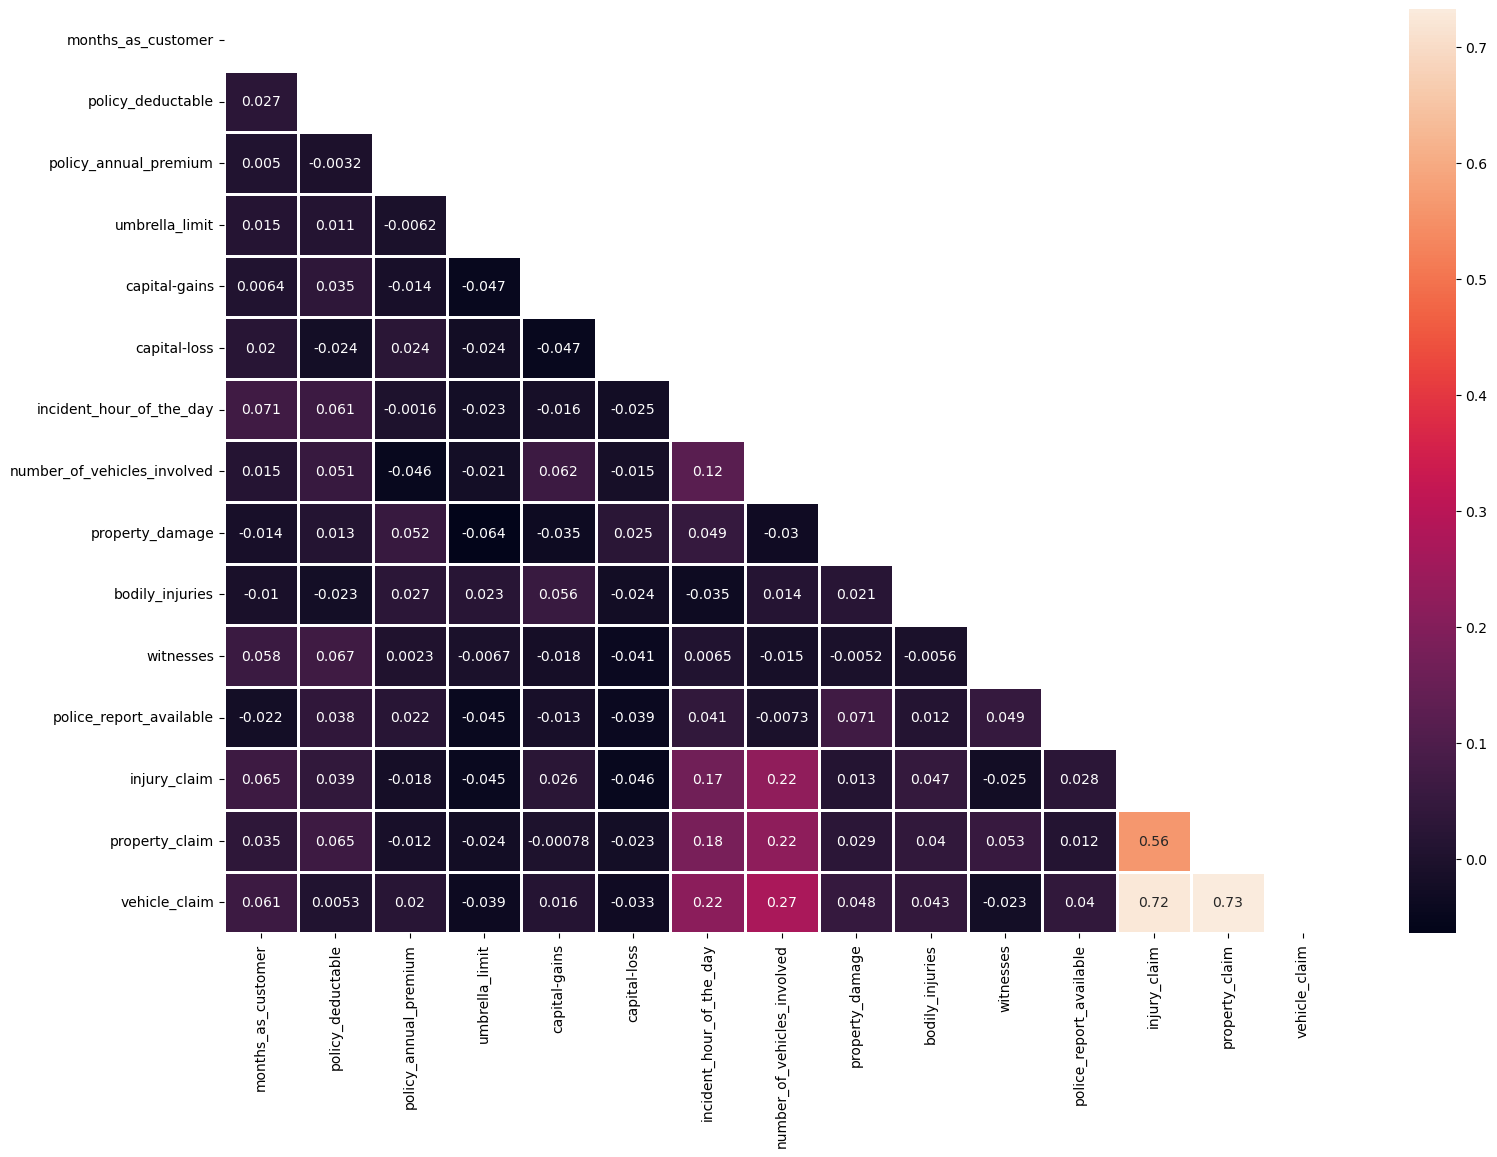

In [41]:
# checking pou multicolinéarité  pour eviter  des conclusions erronées

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [16]:
"""
En observant le graphique ci-dessus, on constate une forte corrélation entre 'Age' et le 'mounths as customer'. 
 Nous allons donc supprimer la colonne 'Age'. 
 De même, il existe une forte corrélation entre 'total_claim_amount', 
'injury_claim', 'property_claim', 'vehicle_claim' , 'total_claim'  est la somme 
 de tous les autres. Nous allons donc supprimer la colonne 'total_claims'
"""
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)
df

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,202,100/300,500,848.07,3000000,MALE,JD,exec-managerial,not-in-family,31000,...,5,1,1,2,1,0,1040,520,4160,Y
1,224,100/300,2000,1291.70,0,FEMALE,JD,sales,not-in-family,0,...,21,1,0,1,0,1,7760,15520,46560,N
2,241,500/1000,2000,1104.50,0,FEMALE,PhD,machine-op-inspct,unmarried,0,...,5,1,0,2,2,0,14100,14100,63450,N
3,64,250/500,1000,954.16,0,MALE,Masters,prof-specialty,husband,53200,...,22,4,0,0,0,0,12600,12600,50400,N
4,166,100/300,2000,1337.28,8000000,MALE,JD,craft-repair,husband,27500,...,10,3,0,2,2,0,7460,7460,52220,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,95,500/1000,2000,1356.64,0,MALE,Masters,machine-op-inspct,not-in-family,67800,...,21,3,1,0,3,1,15120,15120,52920,N
996,205,100/300,2000,1387.70,4000000,FEMALE,High School,priv-house-serv,other-relative,0,...,19,1,0,2,1,0,15660,15660,54810,N
997,41,100/300,1000,1004.14,0,MALE,Masters,priv-house-serv,wife,35400,...,13,3,0,1,3,0,9600,4800,33600,N
998,137,500/1000,500,1107.07,0,FEMALE,High School,protective-serv,husband,0,...,21,1,0,0,0,1,600,600,2100,N


In [17]:
#separation du label du data-frame

X=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [18]:
#Encodage des colonnes categoriels
cat_df=X.select_dtypes(include=['object'])


In [19]:

# affichage des valeurs uniques de chaque colonne
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

cat_df=pd.get_dummies(cat_df,drop_first=True)

cat_df


policy_csl: 
['100/300' '500/1000' '250/500']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['JD' 'PhD' 'Masters' 'Associate' 'High School' 'MD' 'College']

insured_occupation: 
['exec-managerial' 'sales' 'machine-op-inspct' 'prof-specialty'
 'craft-repair' 'adm-clerical' 'farming-fishing' 'tech-support'
 'other-service' 'transport-moving' 'priv-house-serv' 'armed-forces'
 'protective-serv' 'handlers-cleaners']

insured_relationship: 
['not-in-family' 'unmarried' 'husband' 'other-relative' 'wife' 'own-child']

incident_type: 
['Vehicle Theft' 'Single Vehicle Collision' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Front Collision' 'Side Collision' 'Rear Collision']

incident_severity: 
['Minor Damage' 'Major Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['None' 'Other' 'Police' 'Ambulance' 'Fire']



,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
996,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
997,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
998,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [20]:
# extraction des colonnes numeriques

num_df = X.select_dtypes(include = ['int64'])
num_df

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
0,202,500,3000000,31000,-30200,5,1,1,2,1,0,1040,520,4160
1,224,2000,0,0,-55600,21,1,0,1,0,1,7760,15520,46560
2,241,2000,0,0,0,5,1,0,2,2,0,14100,14100,63450
3,64,1000,0,53200,0,22,4,0,0,0,0,12600,12600,50400
4,166,2000,8000000,27500,0,10,3,0,2,2,0,7460,7460,52220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,95,2000,0,67800,-48600,21,3,1,0,3,1,15120,15120,52920
996,205,2000,4000000,0,0,19,1,0,2,1,0,15660,15660,54810
997,41,1000,0,35400,0,13,3,0,1,3,0,9600,4800,33600
998,137,500,0,0,-45300,21,1,0,0,0,1,600,600,2100


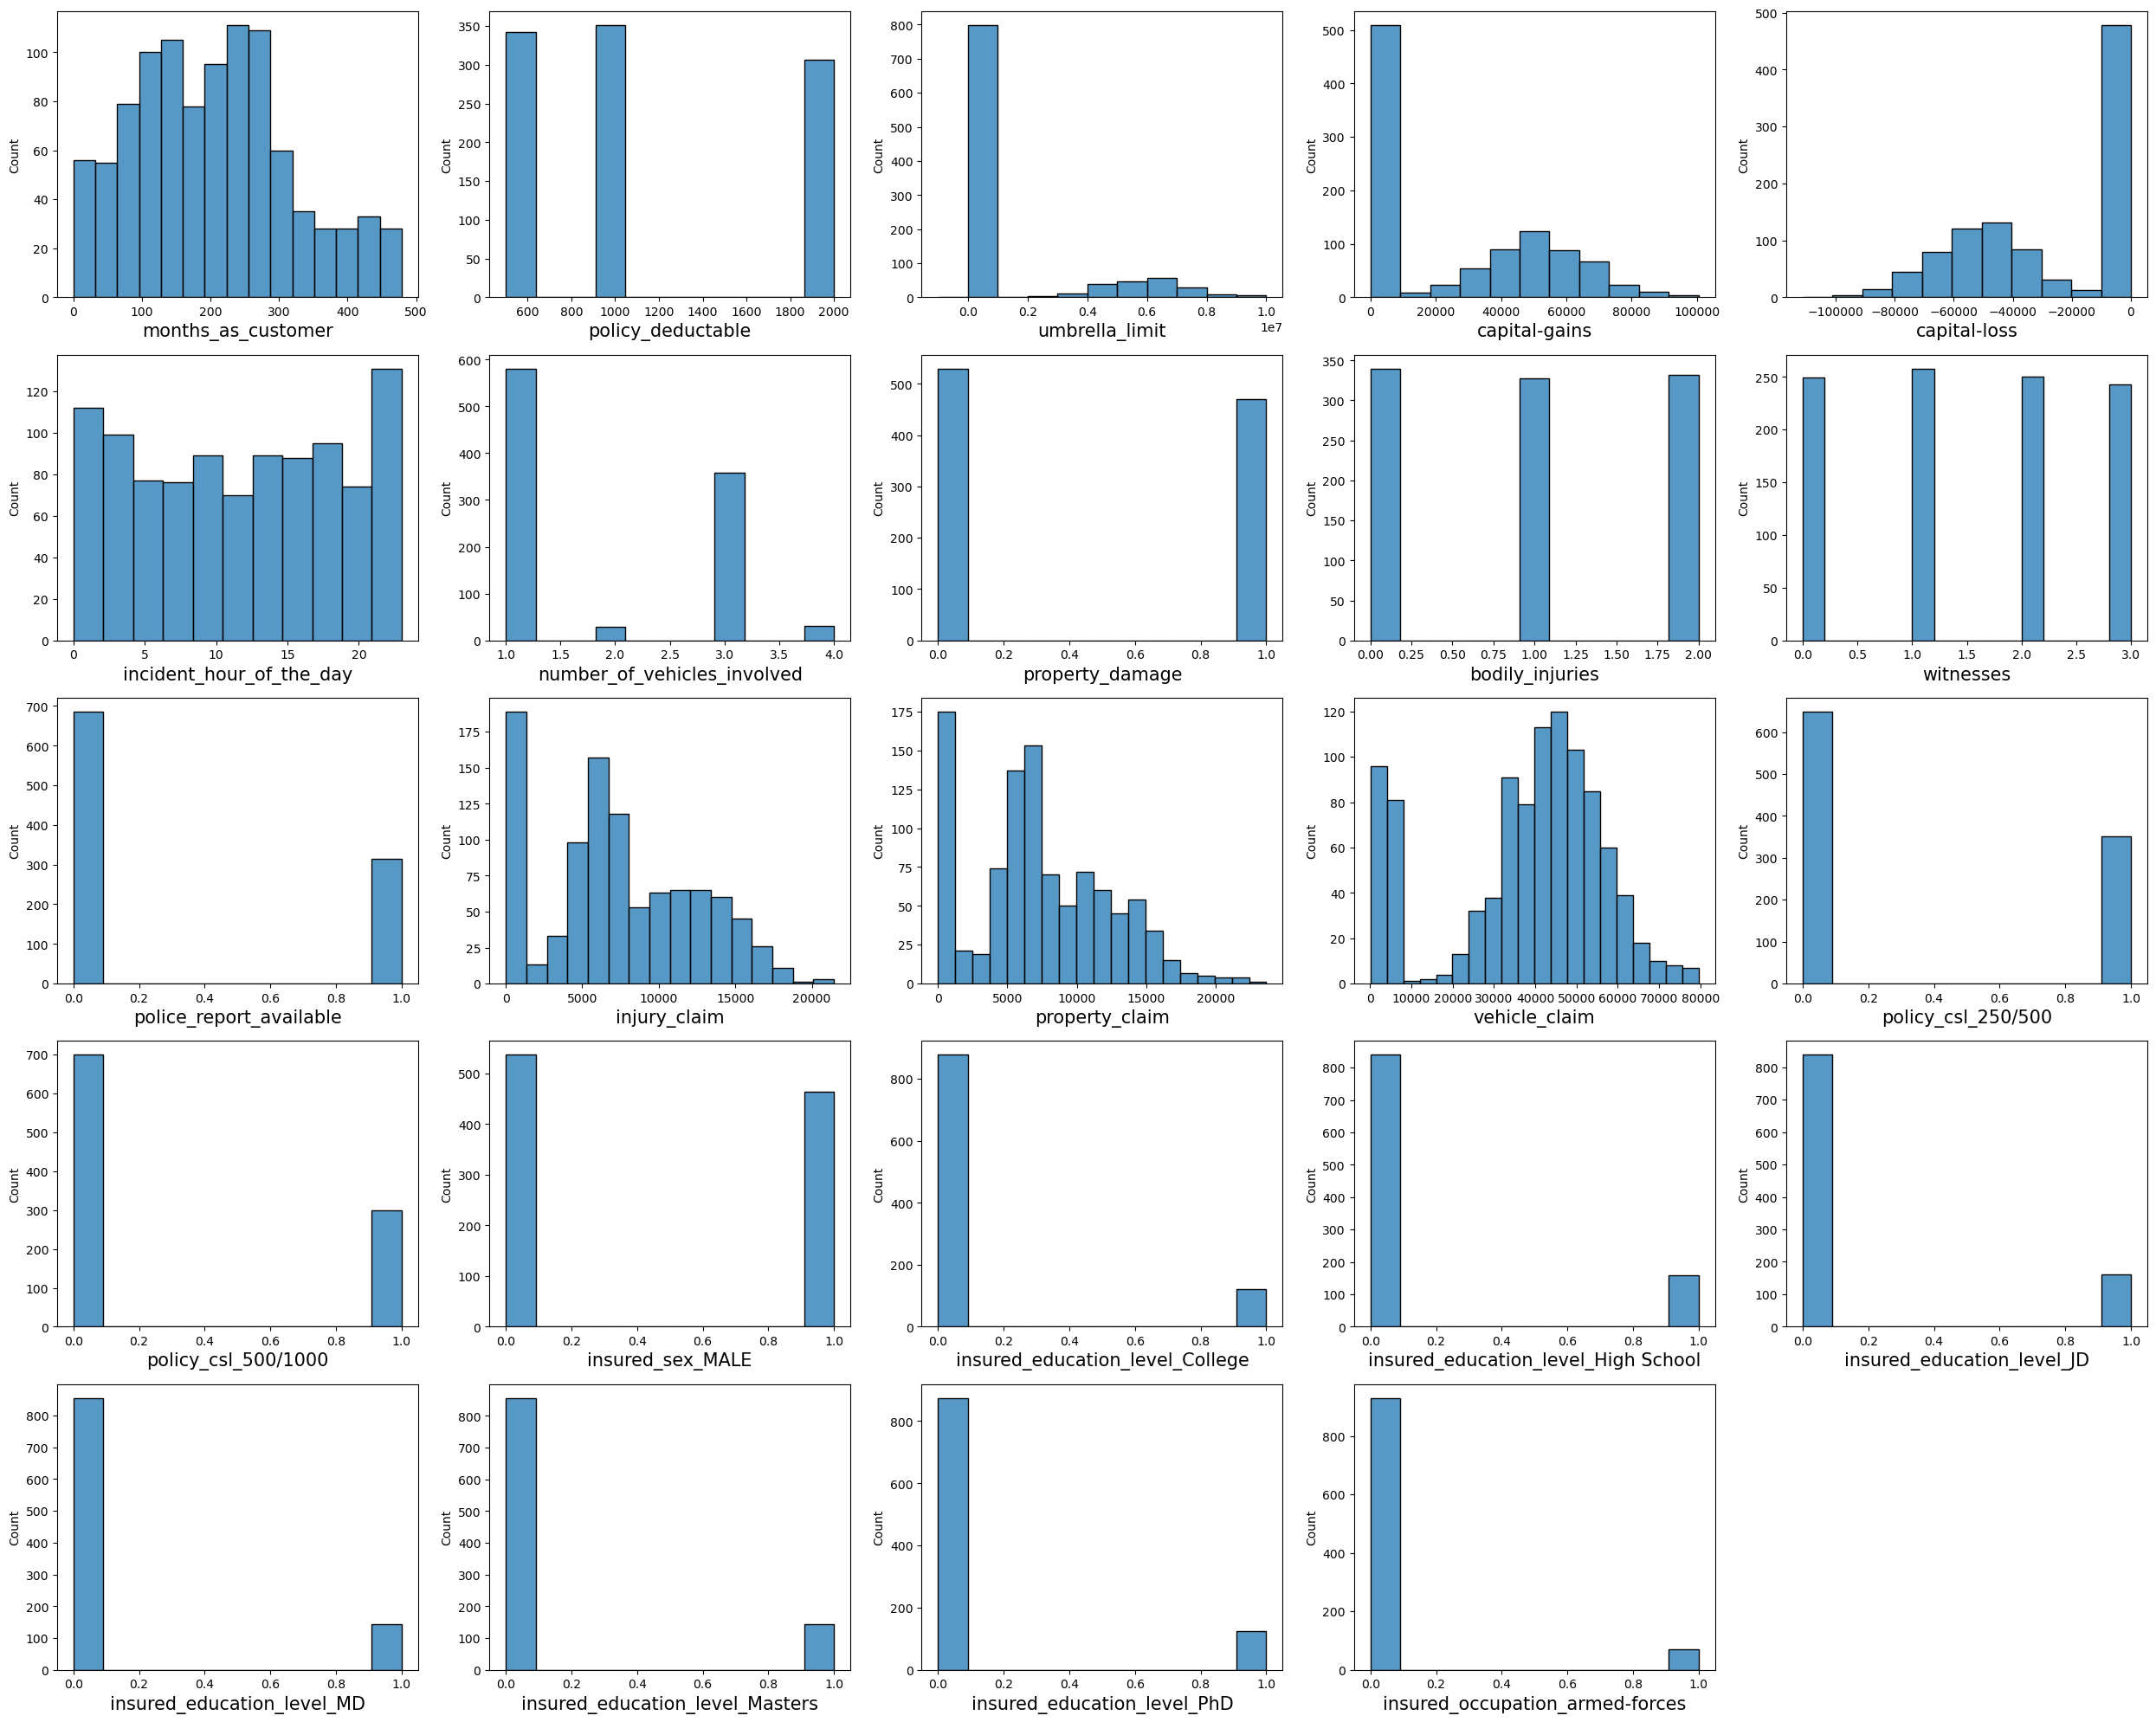

In [21]:
#comibinaison des colonnes numerique et categoriels pour avoir une seule dataset

X = pd.concat([num_df, cat_df], axis = 1)

plotnumber = 1
plt.figure(figsize = (25, 20))
for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.histplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()


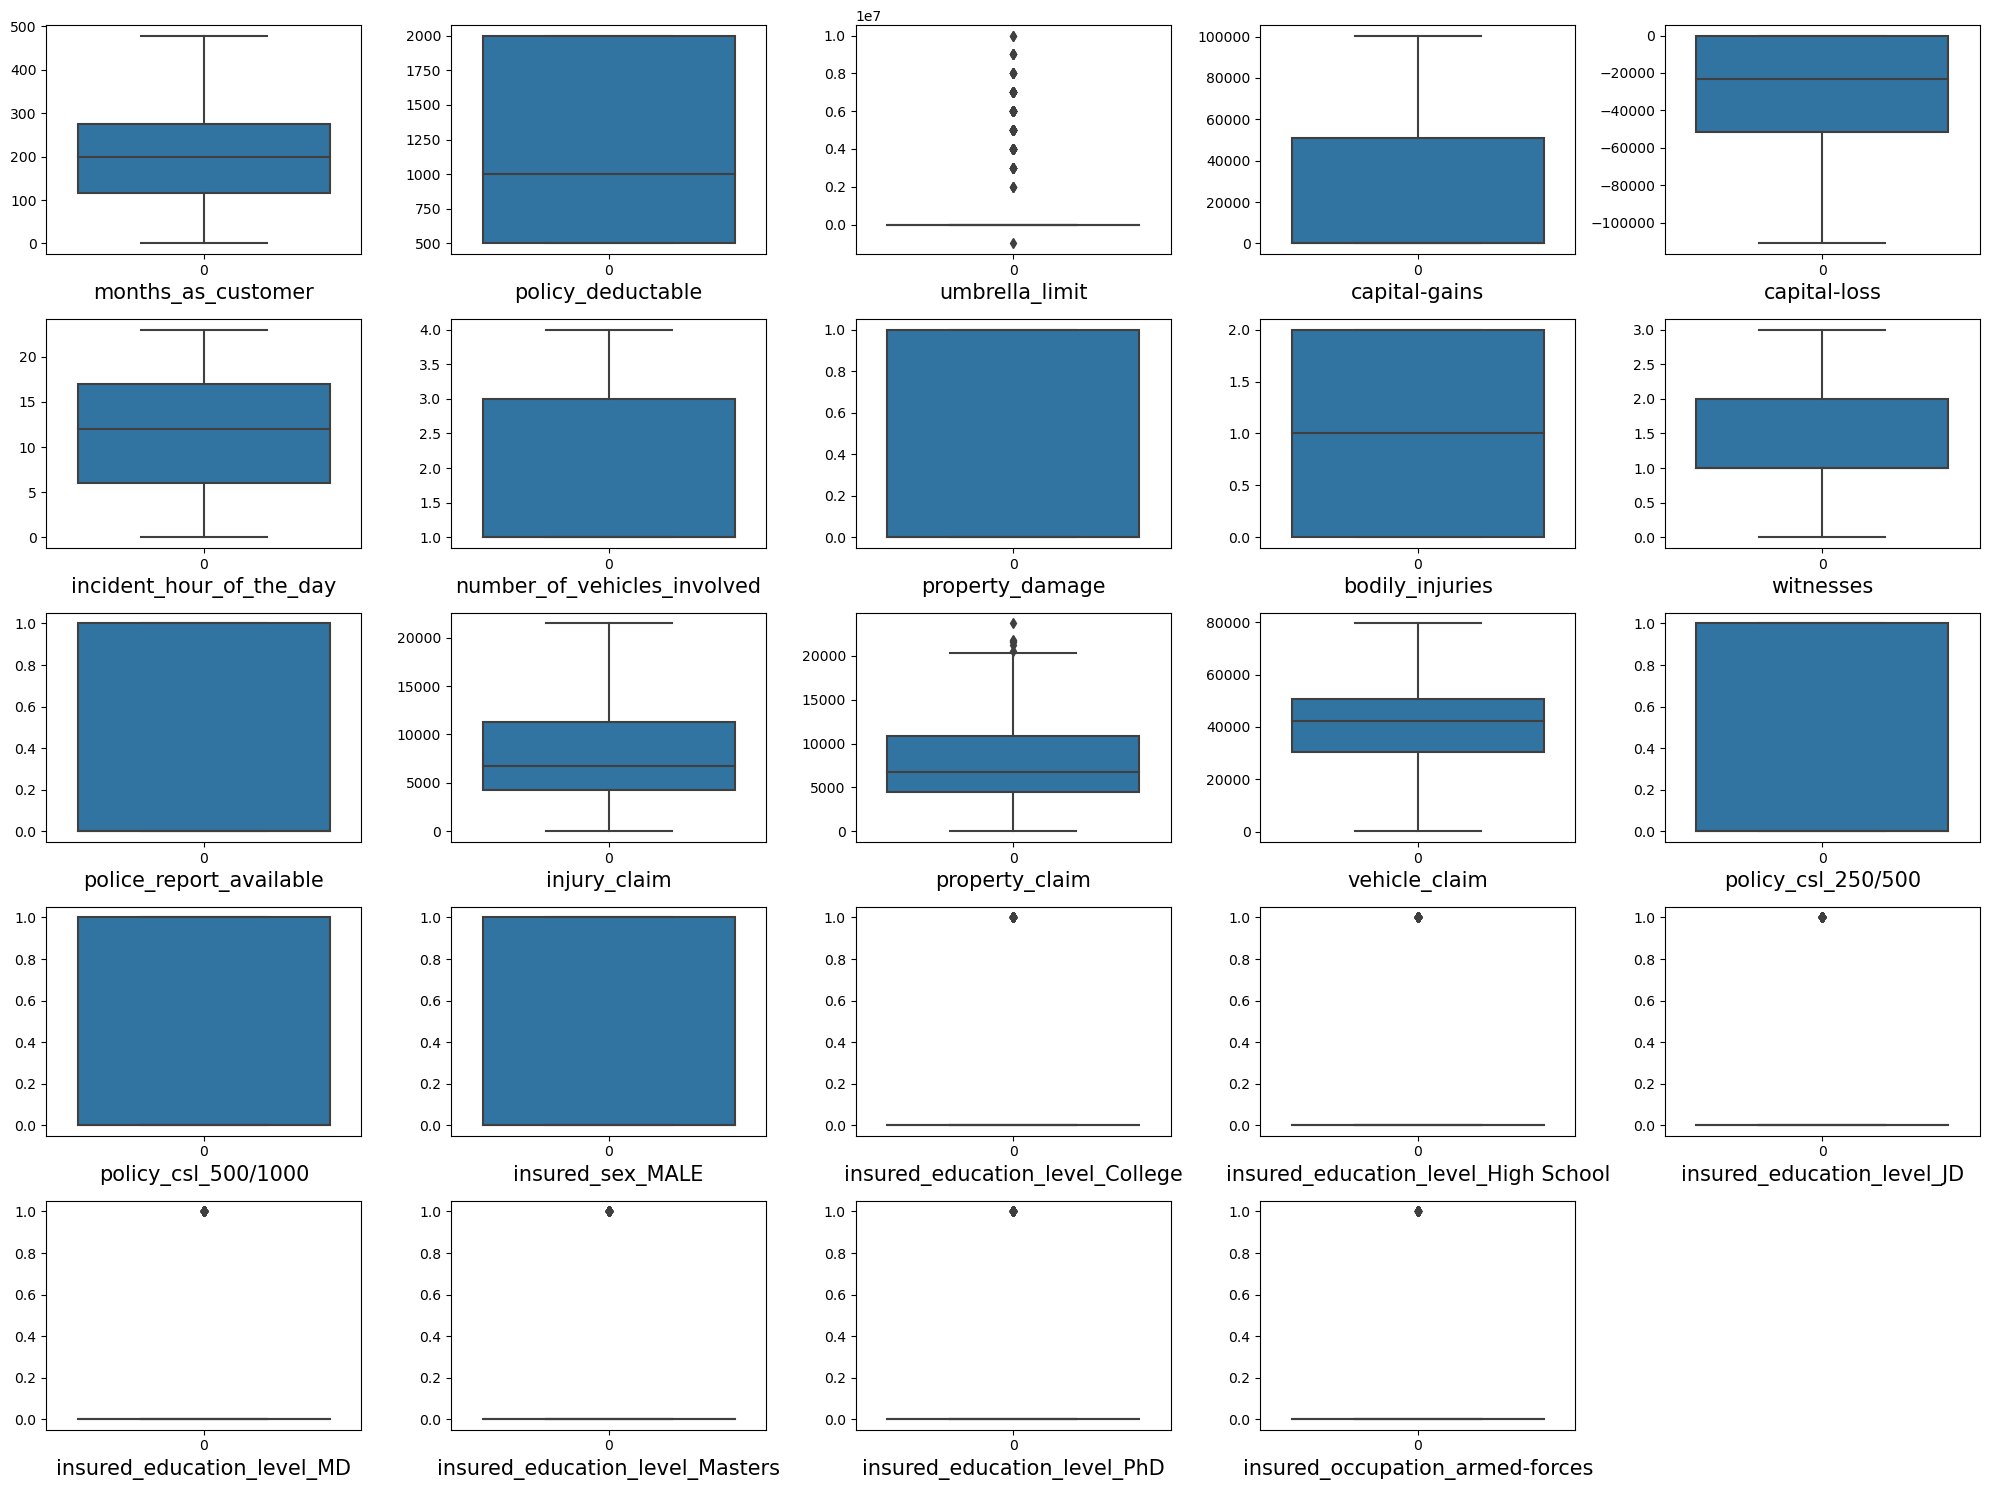

In [22]:
#notre data est bien 

#verifions notre data est ce qu'elle contient des valeurs abberantes "outliers"

plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [23]:
#Des valeurs aberrantes sont présentes dans certaines colonnes numériques. 
#Nous mettrons à l'échelle les colonnes numériques ultérieurement.

"""splitting data"""

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

X_train.head()
X_test.head()
y_train.head()
y_test.head()

num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit','capital-gains', 'capital-loss', 'incident_hour_of_the_day','number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim','vehicle_claim']]
num_df

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
38,431,2000,0,65700,0,4,3,2,0,12460,6230,43610
377,7,1000,0,0,-45300,21,1,1,2,6940,6940,48580
328,162,1000,0,30700,0,7,1,0,0,360,720,2520
125,11,2000,0,56600,-45800,22,1,0,1,7310,7310,51170
217,298,500,0,47800,0,17,1,2,2,2810,5620,19670
...,...,...,...,...,...,...,...,...,...,...,...,...
360,47,500,0,64800,-24300,23,1,1,3,11440,5720,45760
417,475,500,0,67400,-83200,20,1,0,2,6500,13000,58500
434,120,1000,0,77900,0,3,1,2,1,580,580,2610
522,78,500,0,0,0,20,1,0,1,680,680,6120


In [24]:
# Scaling des valeurs numerique dans otre dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

X_train.drop(columns = scaled_num_df.columns, inplace = True)

X_train = pd.concat([scaled_num_df, X_train], axis = 1)
X_train 

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
38,1.921330,1.459624,-0.471306,1.458923,0.958487,-1.118478,1.167910,1.197080,-1.342720,1.008120,...,0,1,0,0,0,0,0,0,0,1
377,-1.708106,-0.196530,-0.471306,-0.892070,-0.651741,1.338975,-0.809365,-0.014539,0.471767,-0.118551,...,0,0,0,0,1,0,0,0,1,0
328,-0.381308,-0.196530,-0.471306,0.206491,0.958487,-0.684810,-0.809365,-1.226158,-1.342720,-1.461575,...,0,0,0,1,0,0,0,1,0,0
125,-1.673866,1.459624,-0.471306,1.133291,-0.669514,1.483531,-0.809365,-1.226158,-0.435477,-0.043031,...,0,0,0,0,1,0,0,0,0,0
217,0.782851,-1.024607,-0.471306,0.818394,0.958487,0.760750,-0.809365,1.197080,0.471767,-0.961513,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-1.365707,-1.024607,-0.471306,1.426718,0.094723,1.628087,-0.809365,-0.014539,1.379010,0.799931,...,0,0,0,1,0,0,0,0,0,1
417,2.297969,-1.024607,-0.471306,1.519756,-1.998929,1.194419,-0.809365,-1.226158,0.471767,-0.208358,...,0,0,0,1,0,0,0,0,0,1
434,-0.740827,-0.196530,-0.471306,1.895485,0.958487,-1.263035,-0.809365,1.197080,-0.435477,-1.416671,...,0,0,0,1,0,0,0,1,0,0
522,-1.100347,-1.024607,-0.471306,-0.892070,0.958487,1.194419,-0.809365,-1.226158,-0.435477,-1.396261,...,1,0,0,1,0,0,0,0,0,1


In [25]:
#passant maintenant au partie d'entrainement des modéles 
#nous avons choisis SVM, KNN, DT, RF et SGB

Training accuracy of Support Vector Classifier is : 0.84
Test accuracy of Support Vector Classifier is : 0.78
[[195   0]
 [ 55   0]]
              precision    recall  f1-score   support

           N       0.78      1.00      0.88       195
           Y       0.00      0.00      0.00        55

    accuracy                           0.78       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.61      0.78      0.68       250



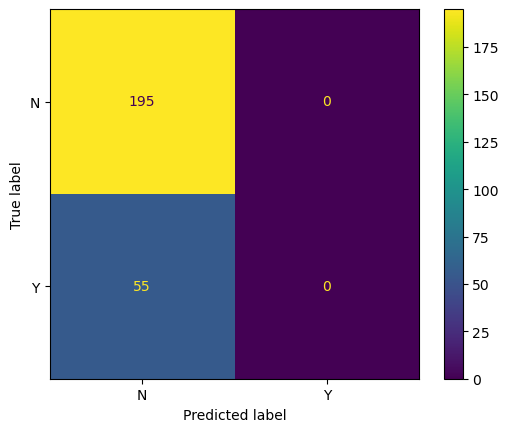

In [42]:
"""---------------Models---------------"""
"""SVM"""
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()
#nous voyons que le model SVM classifier (SVC) n'a pas pu de bien classier les fraudes il nous a classifé tous les "non fraude" comme "non fraude " et tous les fraude comme non fraude 

Training accuracy of KNN is : 0.7453333333333333
Test accuracy of KNN is : 0.78
[[195   0]
 [ 55   0]]
              precision    recall  f1-score   support

           N       0.78      1.00      0.88       195
           Y       0.00      0.00      0.00        55

    accuracy                           0.78       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.61      0.78      0.68       250



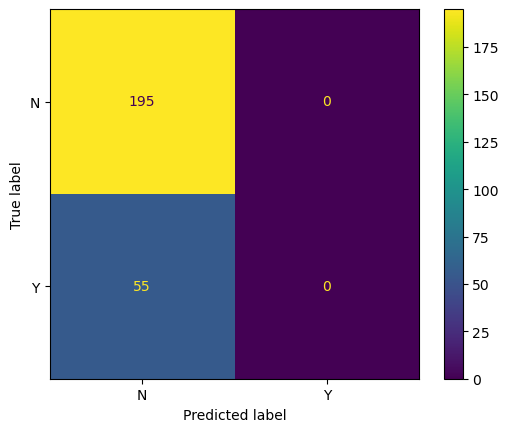

In [43]:
"""KNN"""
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# accuracy_score, confusion_matrix and classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()
#nous voyons que le model KNN aussi  n'a pas pu de bien classier les fraudes il nous a classifé tous les "non fraude" comme "non fraude " et tous les fraude comme non fraude 

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.46
[[104  91]
 [ 44  11]]
              precision    recall  f1-score   support

           N       0.70      0.53      0.61       195
           Y       0.11      0.20      0.14        55

    accuracy                           0.46       250
   macro avg       0.41      0.37      0.37       250
weighted avg       0.57      0.46      0.50       250



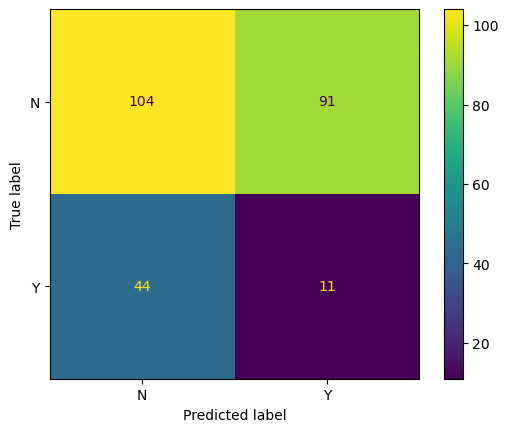

In [44]:

"""DT"""

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)


# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()
plt.show()
#pour le model DT n'a pas pu de bien classier les fraudes il nous a classifé des non fraud comme fraudes et aussi d'autre fraude comme non fraude

Training accuracy of Random Forest is : 0.976
Test accuracy of Random Forest is : 0.796
[[192   3]
 [ 48   7]]
              precision    recall  f1-score   support

           N       0.80      0.98      0.88       195
           Y       0.70      0.13      0.22        55

    accuracy                           0.80       250
   macro avg       0.75      0.56      0.55       250
weighted avg       0.78      0.80      0.74       250



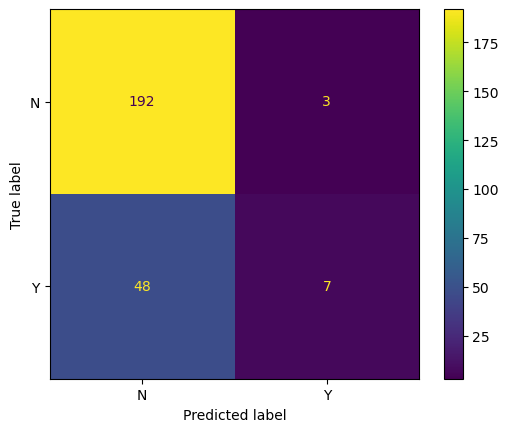

In [45]:

"""RF"""

from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=rand_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rand_clf.classes_)
disp.plot()
plt.show()
#pour le model RF a été un peu de bien classier les fraudes il nous a classifé  bien le non fraud comme non fraudes mais il a essayé de classifier quelque fraudes comme réels fraudes 

Training Accuracy of Stochastic Gradient Boosting is 0.924
Test Accuracy of Stochastic Gradient Boosting is 0.736 

Confusion Matrix :- 
[[172  23]
 [ 43  12]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.80      0.88      0.84       195
           Y       0.34      0.22      0.27        55

    accuracy                           0.74       250
   macro avg       0.57      0.55      0.55       250
weighted avg       0.70      0.74      0.71       250



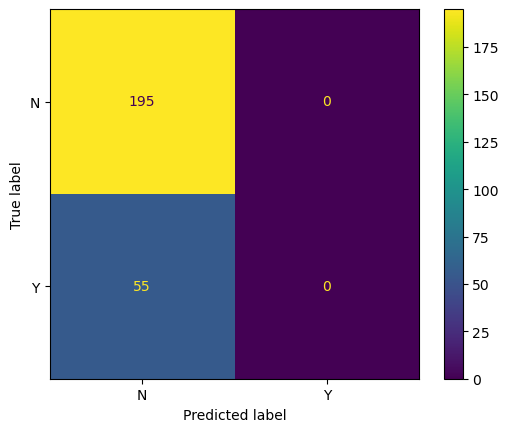

In [53]:

"""Stochastic Gradient Boosting (SGB)"""
from sklearn.ensemble import GradientBoostingClassifier
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")
#matrice de confusion

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=sgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgb.classes_)
disp.plot()
plt.show()
#pour le model SGB il est come RF , il a été un peu de bien classier les fraudes il nous a classifé  bien le non fraud comme non fraudes mais il a essayé de classifier quelque fraudes comme réels fraudes 

In [ ]:
#Voting Classifier

from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
                 ('SGB', sgb),]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)


In [ ]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#matrice de confusion

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=vc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vc.classes_)
disp.plot()
plt.show()

In [58]:
#Comparaiso des modèles 
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest', 'SGB', 'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc,  sgb_acc, vc_test_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.796
0,SVC,0.780
1,KNN,0.780
5,Voting Classifier,0.780
4,SGB,0.736
2,Decision Tree,0.460


In [59]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly.express as px

In [68]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly', title = 'Models Comparaison')